# Clustering Project: All Life Bank Customer Segmentation

## Description

### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

### Dataset: Credit+Card+Customer+Data.xlsxDownload Credit+Card+Customer+Data.xlsx

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns


## Load and review data

In [3]:
# load the data

path = "/Users/User/Downloads/AI_LeadTech/projects/unsupervised_learning/Project-Bank_Customer_Segmentation/Credit+Card+Customer+Data.csv"

data = pd.read_csv(path)

## Explore the data

In [4]:
# let's create a copy of the data

df = data.copy()

In [5]:
# Check number of columns and rows in data frame

df.shape

(660, 7)

In [6]:
# check first 5 rows of data set

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [8]:
# drop the Sl_No column as it does not add any value to the analysis

df.drop('Sl_No', axis=1, inplace=True)

In [9]:
# checking column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


#### Observation(s)
There are no missing value in the dataset

In [11]:
# checking for duplicate values

df.duplicated().sum()

0

#### Observation(s)
- There are no duplicate value in the data.

In [12]:
# Get all the columns in the data set
cols = df.columns.to_list()

In [13]:
# print out the numbers of unique entries and all the frequency for each variables

for col in cols:
    unique_vals = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_vals}")
    print(f"Frequency of {col} variable in decending order below")
    print(df[col].value_counts())
    print('*' * 50)
    print("\n")

Number of unique values in Customer Key: 655
Frequency of Customer Key variable in decending order below
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64
**************************************************


Number of unique values in Avg_Credit_Limit: 110
Frequency of Avg_Credit_Limit variable in decending order below
8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
**************************************************


Number of unique values in Total_Credit_Cards: 10
Frequency of Total_Credit_Cards variable in decending order below
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
**************************************************


Number o

#### **Observations**
We can classify the variable into categorical and non-categorical

- *Total_Credit_Cards*, *Total_visits_bank*, *Total_visits_online* and *Total_calls_made* are categorical-type variables.
- *Avg_Credit_Limit*, is a numerical variables.

In [14]:
# Let's look at the statistical summary of the data

df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


#### Observation(s)

- The Avg_Credit_Limit range is between 3,000 and 200,000. Meaning the dataset does not consider retiree
- Every customer has at least 1 credit card
- The mean Total_visit to bank and online is low
- The mean Total_calls_made to her customer service is low 

## Exploratory Data Analysis

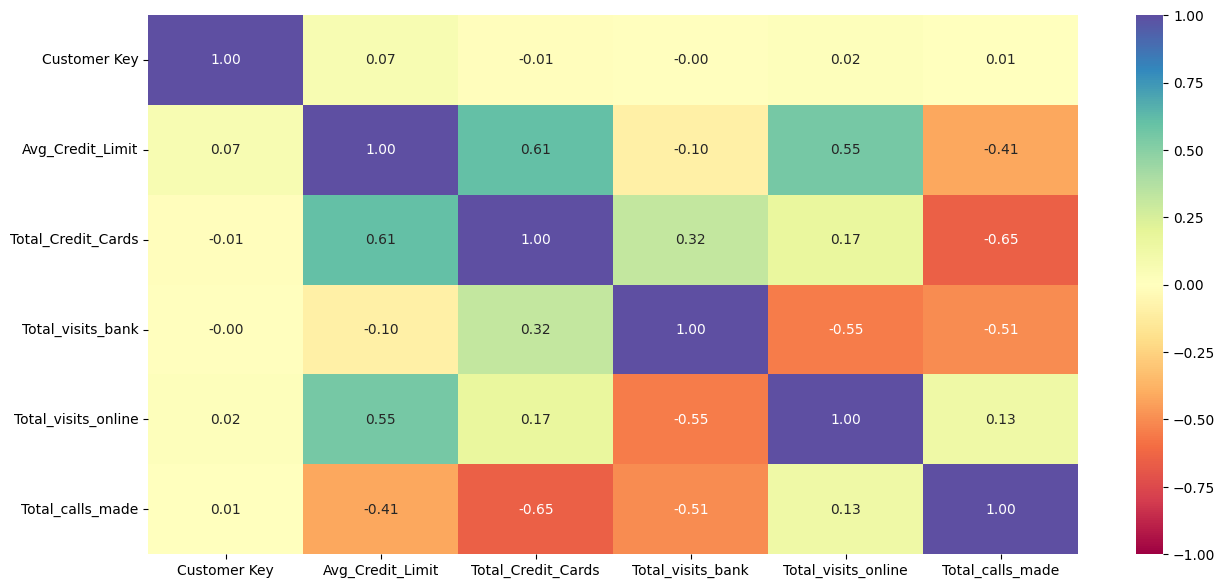

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()